# Ejercicio 3
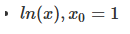

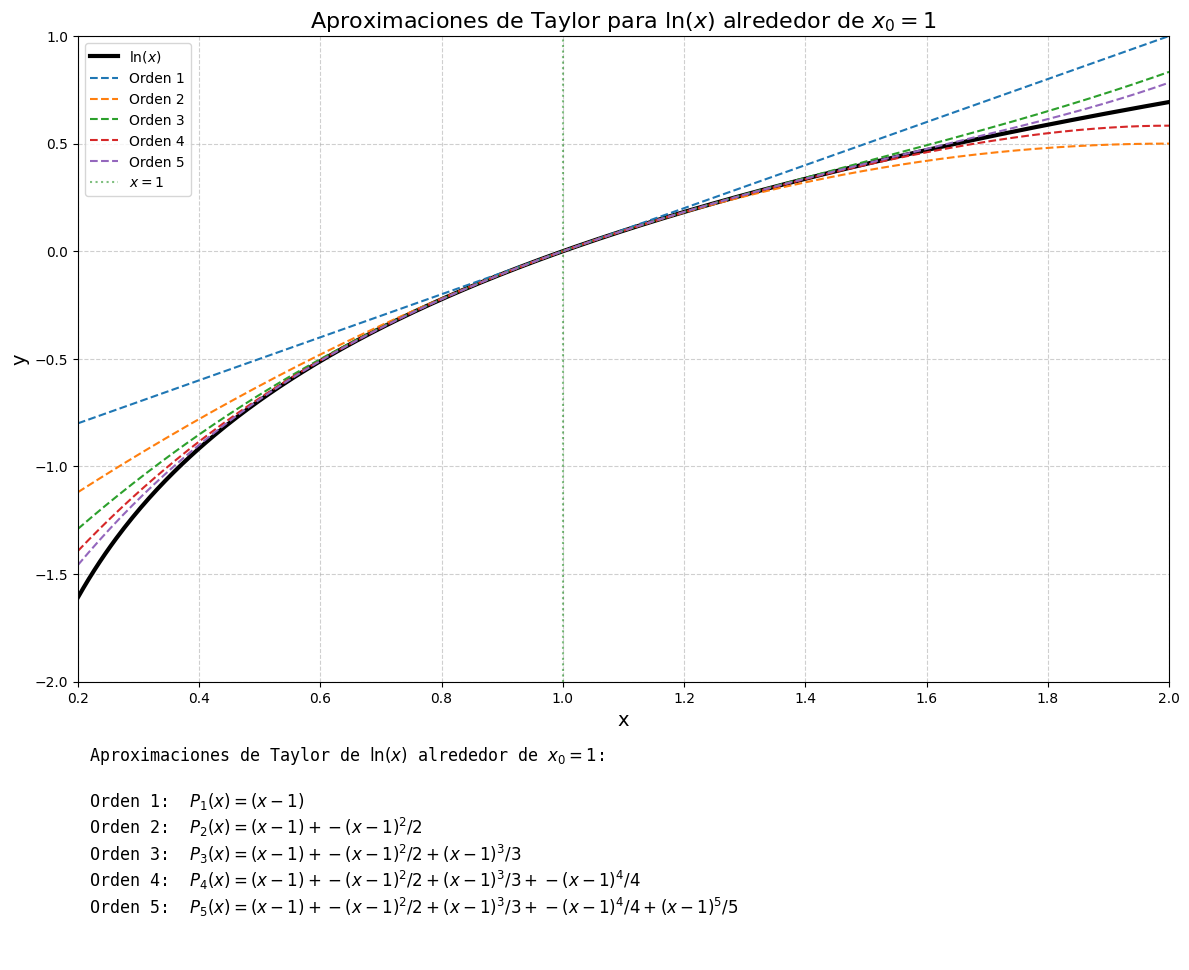

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --------------------------
# Función de Taylor para ln(x)
# --------------------------
def ln_taylor(x, order):
    result = 0
    for n in range(1, order + 1):
        result += ((-1) ** (n + 1)) * ((x - 1) ** n) / n
    return result

# --------------------------
# Generador de ecuación en texto
# --------------------------
def get_ln_taylor_equation(order):
    terms = []
    for n in range(1, order + 1):
        sign = "-" if n % 2 == 0 else ""
        if n == 1:
            terms.append(f"{sign}(x - 1)")
        else:
            terms.append(f"{sign}(x - 1)^{n}/{n}")
    return " + ".join(terms).replace("+-", "- ")

# --------------------------
# Rango de valores y órdenes
# --------------------------
x = np.linspace(0.2, 2, 400)
orders = list(range(1, 6))  # Orden del 1 al 5

# --------------------------
# Crear figura con 2 subplots (gráfico y ecuaciones)
# --------------------------
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), gridspec_kw={'height_ratios': [3, 1]})

# --------------------------
# Parte 1: Gráfico
# --------------------------
ax1.set_title('Aproximaciones de Taylor para $\\ln(x)$ alrededor de $x_0 = 1$', fontsize=16)
x_valid = x[x > 0]
ax1.plot(x_valid, np.log(x_valid), 'k', linewidth=3, label='$\\ln(x)$')

# Graficar aproximaciones de Taylor
for order in orders:
    y = np.array([ln_taylor(xi, order) if xi > 0 else np.nan for xi in x])
    ax1.plot(x, y, '--', linewidth=1.5, label=f'Orden {order}')

# Decoración del gráfico
ax1.axvline(x=1, color='green', linestyle=':', alpha=0.5, label='$x = 1$')
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.legend(loc='upper left', fontsize=10)
ax1.set_xlim(0.2, 2)
ax1.set_ylim(-2, 1)

# --------------------------
# Parte 2: Ecuaciones en texto
# --------------------------
ax2.axis('off')  # Ocultar el sistema de ejes

# Armar texto con ecuaciones
equation_text = "Aproximaciones de Taylor de $\\ln(x)$ alrededor de $x_0 = 1$:\n\n"
for order in orders:
    equation = get_ln_taylor_equation(order)
    equation_text += f"Orden {order}:  $P_{{{order}}}(x) = {equation}$\n"

# Mostrar las ecuaciones como texto
ax2.text(0.01, 1, equation_text, fontsize=12, va='top', ha='left', family='monospace')

# Ajustar espaciado
plt.tight_layout()
plt.show()
